## Import libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import shutil
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

## Generate image dataset

In [2]:
train_ds, val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Cervical Cancer/Training",
    validation_split = 0.2,
    subset = "both",
    seed = 1337,
    image_size = (180, 180),
    batch_size = 128,
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "dataset/Cervical Cancer/Testing",
    image_size = (180, 180),
    batch_size = 128,
    shuffle = False
)

class_names = os.listdir("dataset/Cervical Cancer/Training")

Found 10000 files belonging to 5 classes.
Using 8000 files for training.
Using 2000 files for validation.
Found 2500 files belonging to 5 classes.


## Visualize the data

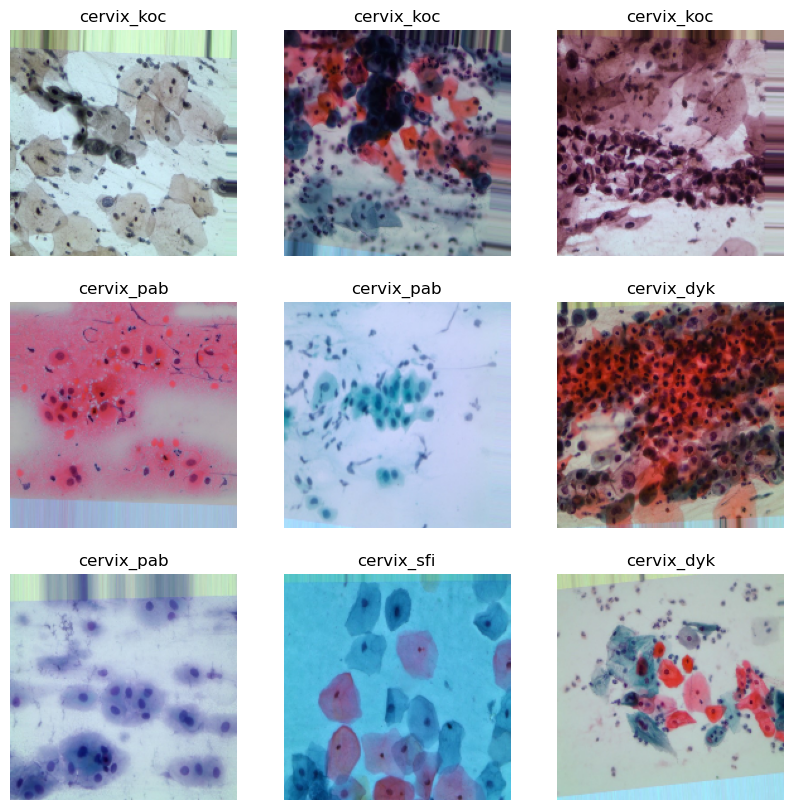

In [3]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

## Standardize the data

In [4]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089
0.0 0.9343087


## Build the model 

In [5]:
num_classes = len(class_names)

model = Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

## Compile the model

In [6]:
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

## Model Summary

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 16)        2

## Train the model

In [8]:
cnn_model = model.fit(train_ds, validation_data = val_ds, epochs = 10)

Epoch 1/10
63/63 [==============================] - 816s 12s/step - loss: 1.3299 - accuracy: 0.4860 - val_loss: 0.9431 - val_accuracy: 0.7170
Epoch 2/10
63/63 [==============================] - 6820s 109s/step - loss: 0.8488 - accuracy: 0.7084 - val_loss: 0.7872 - val_accuracy: 0.7200
Epoch 3/10
63/63 [==============================] - 543s 8s/step - loss: 0.6848 - accuracy: 0.7490 - val_loss: 0.6176 - val_accuracy: 0.7790
Epoch 4/10
63/63 [==============================] - 577s 9s/step - loss: 0.5500 - accuracy: 0.7965 - val_loss: 0.5023 - val_accuracy: 0.8290
Epoch 5/10
63/63 [==============================] - 631s 9s/step - loss: 0.4588 - accuracy: 0.8264 - val_loss: 0.4288 - val_accuracy: 0.8515
Epoch 6/10
63/63 [==============================] - 1134s 16s/step - loss: 0.3708 - accuracy: 0.8630 - val_loss: 0.4306 - val_accuracy: 0.8370
Epoch 7/10
63/63 [==============================] - 2217s 34s/step - loss: 0.3169 - accuracy: 0.8844 - val_loss: 0.3232 - val_accuracy: 0.8825
Epoch

## Save the model

In [10]:
model.save("models/cervical_cancer_model.h5")

In [11]:
pip install flask

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: flask in c:\users\theophilus\anaconda3\lib\site-packages (1.1.2)

